In [291]:
#HR ATTRITION PROJECT 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [292]:
data = r'C:\Users\manish\Desktop\data trained projects\attrition.csv'
att = pd.read_csv(data)

In [293]:
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [294]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [295]:
att.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [296]:
att.shape

(1470, 35)

In [297]:
#No null values present in data 
att.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [298]:
att.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [300]:
#att.Attrition.value_counts()
#','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'
att['Attrition']=att['Attrition'].replace({'No':0,'Yes':1})
def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(att[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict
att['BusinessTravel'].replace(encode_data('BusinessTravel'),inplace = True)
att['Department'].replace(encode_data('Department'),inplace = True)
att['EducationField'].replace(encode_data('EducationField'),inplace = True)
att['Gender'].replace(encode_data('Gender'),inplace = True)
att['JobRole'].replace(encode_data('JobRole'),inplace = True)
att['MaritalStatus'].replace(encode_data('MaritalStatus'),inplace = True)
att['Over18'].replace(encode_data('Over18'),inplace = True)
att['OverTime'].replace(encode_data('OverTime'),inplace = True)


In [301]:
att.Attrition.value_counts()
#att.head()

0    1233
1     237
Name: Attrition, dtype: int64

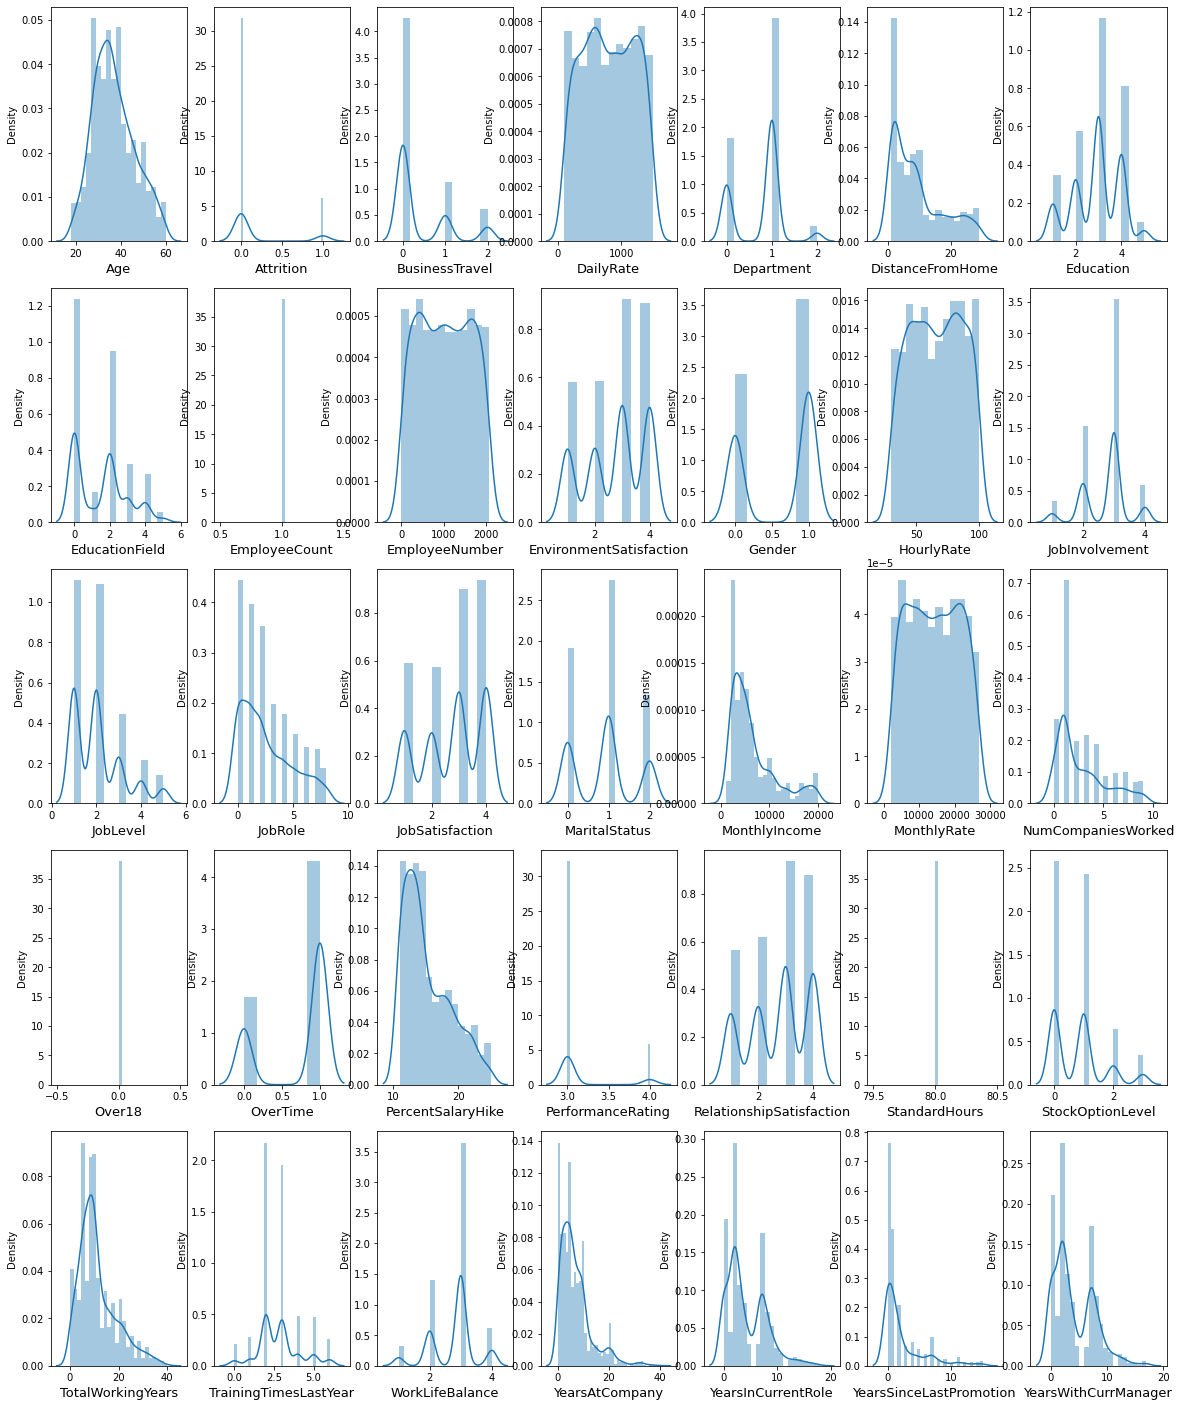

In [302]:
x=att
#visualizing the data 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=35:
        ax= plt.subplot(5,7,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.show()


In [303]:
att.EducationField.value_counts()

0    606
2    464
3    159
4    132
1     82
5     27
Name: EducationField, dtype: int64

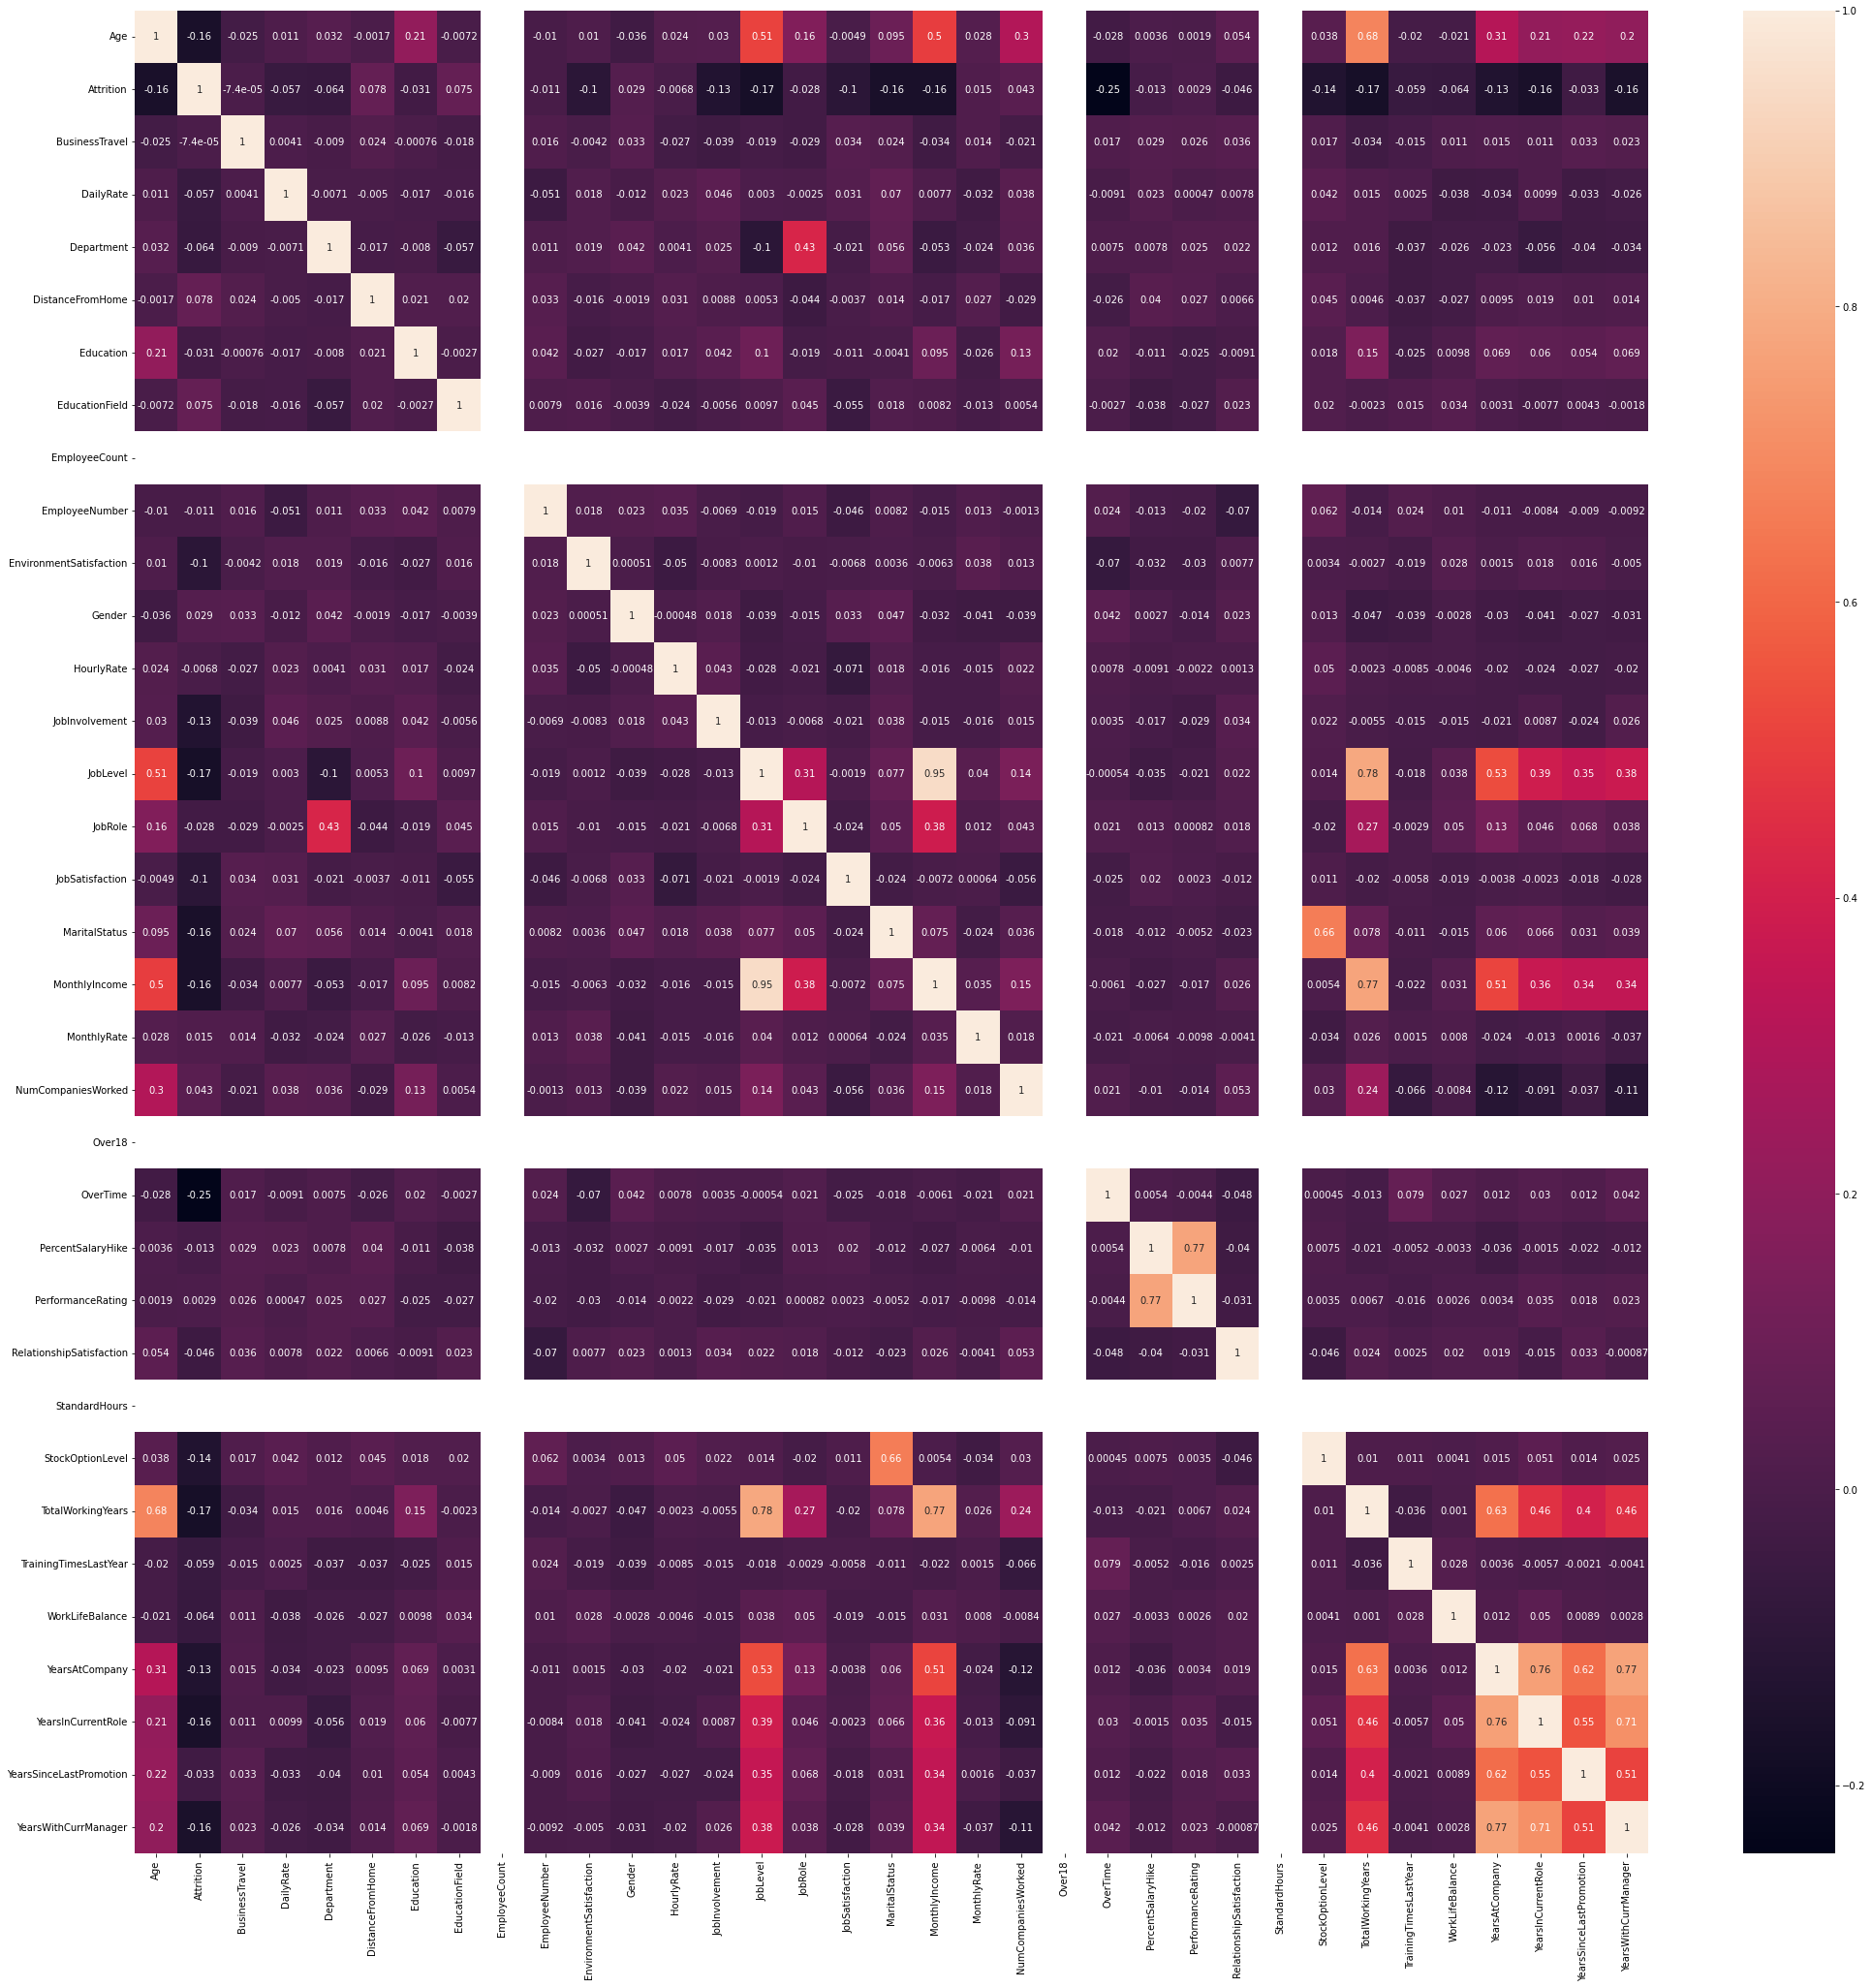

In [304]:
df_corr=att.corr().abs()

plt.figure(figsize=(35,35))
sns.heatmap(att.corr(), annot=True, annot_kws={'size':10})
plt.show()

In [305]:
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [306]:
#dropping coluns not affecting target variable

att.drop('EmployeeCount', axis = 1, inplace = True)
att.drop('StandardHours', axis = 1, inplace = True)
att.drop('EmployeeNumber', axis = 1, inplace = True)
att.drop('Over18', axis = 1, inplace = True)
print(att.shape)

(1470, 31)


In [307]:
y = att['Attrition']
x = att.drop(['Attrition'],axis=1)


In [308]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 123)
scaler = StandardScaler()

In [309]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [310]:
log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [311]:
y_pred = log_reg.predict(x_test)

In [312]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9021739130434783

The optimal number of neighbors is  25 


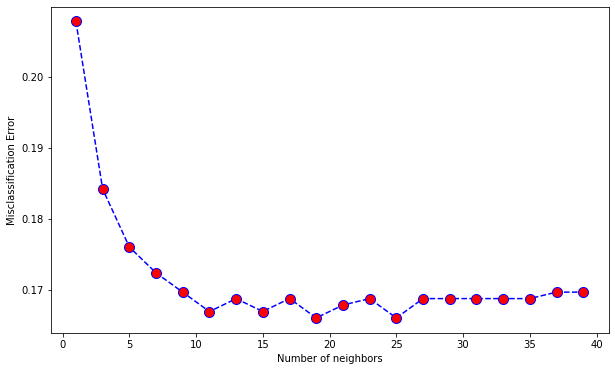

In [314]:
#getting accuracy score through knn

from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 40, 2):
	neighbors.append(k)
	knn = KNeighborsClassifier(n_neighbors = k)
	scores = cross_val_score(
		knn, x_train, y_train, cv = 10, scoring = 'accuracy')
	cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()


In [315]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

def print_score(clf, x_train, y_train, x_test, y_test, train = True):
	if train:
		print("Train Result:")
		print("------------")
		print("Classification Report: \n {}\n".format(classification_report(
				y_train, clf.predict(x_train))))
		print("Confusion Matrix: \n {}\n".format(confusion_matrix(
				y_train, clf.predict(x_train))))

		res = cross_val_score(clf, x_train, y_train,
							cv = 10, scoring ='accuracy')
		print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
		print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
		print("accuracy score: {0:.4f}\n".format(accuracy_score(
				y_train, clf.predict(x_train))))
		print("----------------------------------------------------------")
				
	elif train == False:
		print("Test Result:")
		print("-----------")
		print("Classification Report: \n {}\n".format(
				classification_report(y_test, clf.predict(x_test))))
		print("Confusion Matrix: \n {}\n".format(
				confusion_matrix(y_test, clf.predict(x_test))))
		print("accuracy score: {0:.4f}\n".format(
				accuracy_score(y_test, clf.predict(x_test))))
		print("-----------------------------------------------------------")
		
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(x_train, y_train)
print_score(knn, x_train, y_train, x_test, y_test, train = True)
print_score(knn, x_train, y_train, x_test, y_test, train = False)


Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       913
           1       1.00      0.02      0.04       189

    accuracy                           0.83      1102
   macro avg       0.92      0.51      0.47      1102
weighted avg       0.86      0.83      0.76      1102


Confusion Matrix: 
 [[913   0]
 [185   4]]

Average Accuracy: 	 0.8339
Accuracy SD: 		 0.0068
accuracy score: 0.8321

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       320
           1       1.00      0.06      0.12        48

    accuracy                           0.88       368
   macro avg       0.94      0.53      0.53       368
weighted avg       0.89      0.88      0.83       368


Confusion Matrix: 
 [[320   0]
 [ 45   3]]

accuracy score: 0.877